
<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Valores atípicos y anomalías</h1>
  <p></p>
</div>

In [1]:
from pandas import DataFrame,read_csv
from matplotlib.pyplot import tight_layout, show,subplot,legend ,subplots, xlabel, style,hist, figure

from seaborn import set, boxplot
from os import chdir
# from dotenv import load_dotenv, find_dotenv

chdir("..")
# load_dotenv('conf/.local') 
set(style="whitegrid")

## Valores atípicos
Un valor atípico es un punto de datos que es significativamente diferente de los datos restantes. En ocasiones, los valores atípicos son muy informativos; por ejemplo, al buscar transacciones con tarjeta de crédito, un valor atípico puede ser un indicio de fraude. En otros casos, los valores atípicos son observaciones raras que no agregan ninguna información adicional. Estos casos también pueden afectar el rendimiento de algunos modelos de aprendizaje automático.

<img src="../images/outliers.png" height="500" width="500" >


"Un valor atípico es una observación que se desvía tanto de las otras observaciones como para despertar sospechas de que fue generada por un mecanismo diferente". [RE. Hawkins Identificación de valores atípicos, Chapman y Hall, 1980.] 

Un valor atípico es una observación que se ubica fuera del patrón general de distribución de los datos ([Mathworld](http://mathworld.wolfram.com/Outlier.html)). 

![](../images/Outlier.png)
![ ](../images/blank.png)



Los valores atípicos pueden deberse a diferentes causas, siendo las principales:
* Casos que no se ajustan al modelo de estudio
* Errores en la medición




<div class="alert alert-warning" role="alert"></div>


- __Outlier__ : punto de datos legítimo que está lejos de la media o mediana en una distribución.
- __Anomalía__ : punto de datos ilegítimos generado por un proceso diferente al que generó el resto de los datos

<div class="alert alert-warning" role="alert">ESTO ES MUY IMPORTANTE</div>



El tratamiento dado a los valores atípicos depende del origen de la inconsistencia. En el caso de errores en la medición pueden eliminarse o ajustarse (como en el caso de [valores faltantes](http://nbviewer.ipython.org/github/rsotoc/pattern-recognition/blob/master/Limpieza%20de%20datos%20I.ipynb)). Cuando la causa es que los casos no se ajustan al modelo utilizado pueden indicar la necesidad de replantear el modelo (incluyendo modificaciones a la teoría, como sucedía con el caso del movimiento anómalo de Mercurio). Sin embargo, también pueden representar casos singulares o excepcionales. En cualquier caso, es importante detectar estos valores, pues su presencia generan tendencias en el análisis global de los datos.

Una forma común de analizar la presencia de valores atípicos es a través de los diagramas de caja (boxplots). El diagrama de caja es una descripción gráfica de la agrupación de los datos en base a sus cuartiles y tiene la siguiente estructura:



![ ](../images/457px-Boxplot.svg.png)
![ ](../images/blank.png)



## Gráficas de cajas y bigotes

Partimos de un conjunto de datos como el siguiente :

![ ](../images/caja_1.png)

El diagrma muestra como se separan los datos para generar los 4 elementos principales de un digrama de caja de bigotes.  ¿Logras deducir el algoritmo a seguir? 

su grafíco de caja y bigotes es el siguiente

![ ](../images/caja_2.png)

__Ahora veamos un ejemplo utilizando código python__

In [2]:
# Crear conjunto de datos 
data = [1,1,6,13,13,14,14,14,15,15,16,18,18,18,19]
pos =  [1,2,1,1,2,1,2,3,1,2,1,1,2,3,1]
# Create the pandas DataFrame 
df_elements =  DataFrame(data, columns = ['Valor'])
df_elements['Name'] = pos

In [3]:
df_elements.head()

,Valor,Name
0,1,1
1,1,2
2,6,1
3,13,1
4,13,2


Nuestro conjunto de datos es el siguiente:

<img src="../images/data_raw_0.png" width="400"/>

podemos identificar los cuartiles `Q1`, `Q2(mediana)`, `Q3`, `máximo` , `mínimo` , `rango` y `IQR` de dicho conjunto de datos,

<img src="../images/data_raw.png" width="800"/>

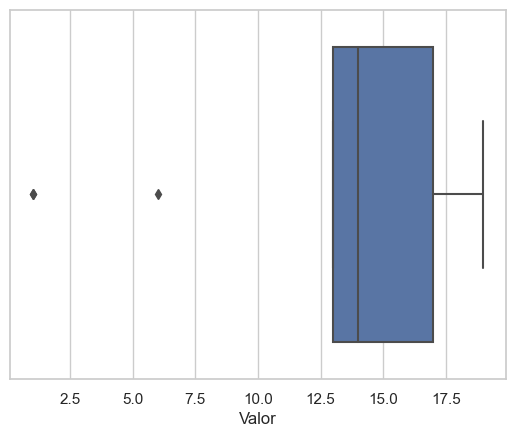

In [4]:
ax = boxplot(x="Valor", data=df_elements)

Colocando los puntos sobre una recta observamos algo como esto :

![ ](../images/grap_1.png)

En esta conveción, los valores atípicos utilizando diagramas de caja y la regla de proximidad del rango intercuartil ( IQR ) se re obtiene de acuerdo con la regla de proximidad IQR, un valor es un valor atípico si cae fuera de estos límites:


Límite superior = $75º cuantil + (IQR * 1.5)$

Límite inferior = $25º cuantil - (IQR * 1.5)$

Aquí, `IQR` viene dado por la siguiente ecuación:

$IQR = 75º cuantil - 25º cuantil$

Por lo general, calculamos los límites de la regla de proximidad `IQR`  multiplicando el `IQR` por `1.5`. Sin embargo, también es una práctica común encontrar valores extremos multiplicando el `IQR` por `3`.

Entonce:


<img src="../images/data_raw.png" width="600"/>
<img src="../images/rango.png" width="600"/>

Regresando a nuestro gráfico de caja y bigotes podemos obtener dos vertientes, (1) sin anomalías o (2) Marcando anomalías
![ ](../images/cajas.png)

El espaciado entre los componentes de una caja reflejan la dispersión y tendencias en los datos. La parte principal de esta representación es la propia caja. La tapa inferior corresponde al primer cuartil (Q1, el punto que separa el 25% de los datos inferiores), la línea intermedia refleja la mediana o segundo cuartil (Q2) y la tapa superior corresponde al tercer cuartil (Q3, el punto que delimita el 75% de los datos inferiores). 

RIC es el *rango inter cuartil* y es el 50% de los datos que quedan al centro del conjunto total de datos. Las líneas punteadas se denomina *bigotes* (*whiskers*); los extremos de los bigotes inferior y superior suelen seleccionarse como el menor dato que aún queda a una distancia máxima de 1.5 veces RIC por abajo de Q1 y el dato máximo a una distancia igual o menor de 1.5 RIC por arriba de Q3. 

## Histogramas y Distribución de datos

Otra forma de detectar valores atípicos es mediantes la gráfica de distribución normal y la varianza de los datos.

La justificación para utilizar la desviación estándar (STD) y el concepto de múltiplos de __sigma (σ)__ para identificar valores atípicos (outliers) se basa en la idea de que en una distribución de datos normal o aproximadamente normal (distribución gaussiana), la mayoría de los valores se encuentran cerca de la media y disminuyen a medida que nos alejamos de la media. Esto se conoce como la regla empírica o la regla $68-95-99.7$, (probeniente de Lla interpretación del `Z-score`) que establece que:

- Aproximadamente el 68% de los datos caen dentro de ±1σ de la media.
- Aproximadamente el 95% de los datos caen dentro de ±2σ de la media.
- Aproximadamente el 99.7% de los datos caen dentro de ±3σ de la media.

En esta regla, σ representa la desviación estándar de la distribución.

La justificación para usar múltiplos de σ para identificar valores atípicos se basa en la idea de que los valores que están más allá de un cierto número de desviaciones estándar de la media son inusuales y pueden considerarse atípicos. Esto se debe a que la mayoría de los datos caen dentro de un rango específico alrededor de la media, y los valores que se alejan significativamente de la media pueden ser considerados como excepciones o anómalos.

Por ejemplo, si decides usar la regla de los ±2σ para identificar valores atípicos en una distribución normal, estarás considerando como atípicos a aquellos valores que están más allá de dos desviaciones estándar de la media. Esto significa que solo alrededor del 5% de los datos caerán fuera de este rango, y estos valores se considerarán atípicos debido a su rareza en la distribución.

Sin embargo, es importante tener en cuenta que esta es una regla simplificada y que la identificación de valores atípicos no se basa únicamente en múltiplos de σ. En la práctica, se pueden utilizar métodos más avanzados, como el método Z-score o gráficos de caja y bigotes, que tienen en cuenta la distribución real de los datos y pueden proporcionar una identificación más precisa de los valores atípicos.

En resumen, la justificación para utilizar la desviación estándar y múltiplos de σ para identificar valores atípicos se basa en la distribución de datos normales y la idea de que los valores que se alejan significativamente de la media son inusuales y pueden considerarse atípicos. Sin embargo, es importante utilizar métodos adecuados y considerar la distribución real de los datos al identificar valores atípicos en situaciones prácticas.

Si graficamos el histograma de los datos de la variable `Valor`, obtendremos el siguiente resultado

<Axes: >

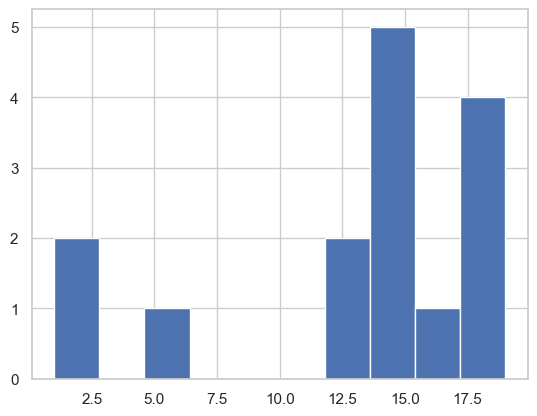

In [5]:
df_elements.Valor.hist()

Ver : https://www.youtube.com/watch?v=6TyepQq9NBc, antes de continuar

obtenemos si desviación estantandar de esta variable :

In [6]:
df_elements.Valor.std()

5.7817446699565895

definimos el umbral de normalidad: $±1$ desviación estándar de la media

In [7]:
sigma = 1

obtenemos la media de los datos :

In [8]:
df_elements.Valor.mean()

13.0

tambien podemos experimentar con la media de los datos :

In [9]:
df_elements.Valor.median()

14.0

o incluso con la moda de los datos :

In [10]:
df_elements.Valor.mode()

0    14
1    18
Name: Valor, dtype: int64

ahora, obtenemos el tope o frontera de normalidad hacia la izquierda :

In [11]:
suelo = df_elements.Valor.mean()-df_elements.Valor.std() * sigma
suelo

7.2182553300434105

también debemos obtener el tope o frontera de normalidad hacia la derecha :

In [12]:
techo = df_elements.Valor.mean() + df_elements.Valor.std() * sigma
techo

18.781744669956588

Una vez que hayas encontrado el piso (límite inferior) o el techo (límite superior) de los datos o los valores que marcan el final de los bigotes en un gráfico de caja y bigotes, puedes tomar decisiones basadas en la identificación de valores atípicos o la evaluación de la distribución de los datos. Aquí hay algunas acciones típicas que puedes realizar:

1. **Identificación de Valores Atípicos:** Si has definido los límites de los bigotes, puedes identificar valores que estén por debajo del límite inferior o por encima del límite superior como valores atípicos potenciales. Estos valores pueden requerir una inspección más detenida y pueden ser considerados como datos inusuales o anómalos en tu conjunto de datos.

2. **Visualización de Distribución:** Observa cómo se distribuyen los datos dentro y fuera de los bigotes. Esto te dará una idea de la dispersión y simetría de los datos. Los valores que caen dentro de los bigotes representan la mayoría de los datos, mientras que los valores fuera de los bigotes pueden ser menos comunes.

3. **Análisis de Dispersión:** Evalúa cuán dispersos están los valores dentro y fuera de los bigotes. Por ejemplo, si los valores fuera de los bigotes están muy agrupados cerca de los bigotes, esto puede indicar una distribución sesgada o asimétrica.

4. **Revisión Contextual:** Considera el contexto de tu análisis y tus objetivos. No todos los valores fuera de los bigotes son necesariamente atípicos; algunos pueden ser legítimos y relevantes para tu estudio. Es importante entender por qué ciertos valores caen fuera de los bigotes antes de tomar decisiones.

5. **Decisión sobre Atípicos:** Decidir qué hacer con los valores identificados como atípicos depende de tus objetivos y del conocimiento de dominio. Puedes optar por :

     1. **Eliminarlos**.
     2. **Investigar su validez**.
     3. **Mantenerlos según su importancia para tu análisis**.
     4. **Aplicar una transformación como la transformacion `log` para tratar de corregir la asimetría y normalidad**.
     5. **Sustituiremos por el valor máximo de los datos**


Recuerda que la identificación de valores atípicos es una parte importante del análisis de datos, pero debe hacerse con cuidado y considerando el contexto. No todos los valores fuera de los bigotes son necesariamente errores o anomalías; a veces, pueden contener información valiosa o representar eventos genuinos. Por lo tanto, es importante combinar el análisis estadístico con el conocimiento del dominio y los objetivos de tu análisis.

In [27]:
# Comprende el código de estas dos funciones y utilizalas para solucionar el problema de `outliers`

def find_boundaries (df, variable, distance): 

    IQR = df [variable] .quantile (0.75) - df [variable] .quantile (0.25) 

    lower_boundary = df [variable] .quantile (0.25) - (IQR * distance) 
    upper_boundary = df [variable] .quantile (0.75) + (IQR * distancia) 

    return upper_boundary, lower_boundary


def anomaly_delete(x, mn, mx):

    # Comprobar si x es mayor que el límite superior (mx)
    if x > mx:
        x = mx
    # Comprobar si x es menor que el límite inferior (mn)
    if x < mn:
        x = mn
    return x


--- 

Analizamos la submuestra de datos de diabetes, en primera instancia para la variable '*gl2h*' y posteriormente para todo el conjunto, utilizando los datos con valores faltantes en cero.

### Valores atípicos con pima-indians-diabetes dataset
  

    emb  gl2h  pad  ept  is2h   imc    fpd  edad  class
0     6   148   72   35     0  33.6  0.627    50      1
1     1    85   66   29     0  26.6  0.351    31      0
2     8   183   64    0     0  23.3  0.672    32      1
3     1    89   66   23    94  28.1  0.167    21      0
4     0   137   40   35   168  43.1  2.288    33      1
5     5   116   74    0     0  25.6  0.201    30      0
6     3    78   50   32    88  31.0  0.248    26      1
7    10   115    0    0     0  35.3  0.134    29      0
8     2   197   70   45   543  30.5  0.158    53      1
9     8   125   96    0     0   0.0  0.232    54      1
10    4   110   92    0     0  37.6  0.191    30      0
11   10   168   74    0     0  38.0  0.537    34      1
12   10   139   80    0     0  27.1  1.441    57      0
13    1   189   60   23   846  30.1  0.398    59      1
14    5   166   72   19   175  25.8  0.587    51      1
15    7   100    0    0     0  30.0  0.484    32      1
16    0   118   84   47   230  45.8  0.551    31

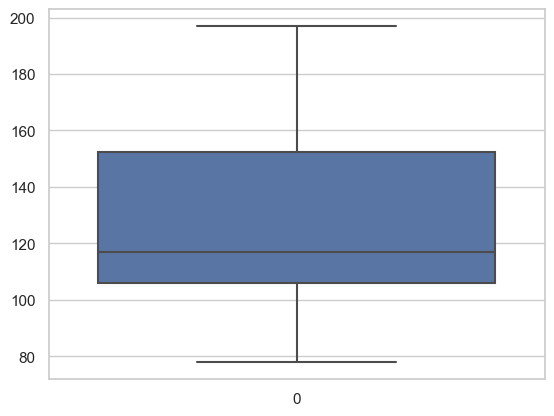

In [18]:
df = read_csv("Data/Pima Indian Data Set/pima-indians-diabetes.data-small-orig", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])

print(df)
print(df.describe())
boxplot(df['gl2h'])
show()

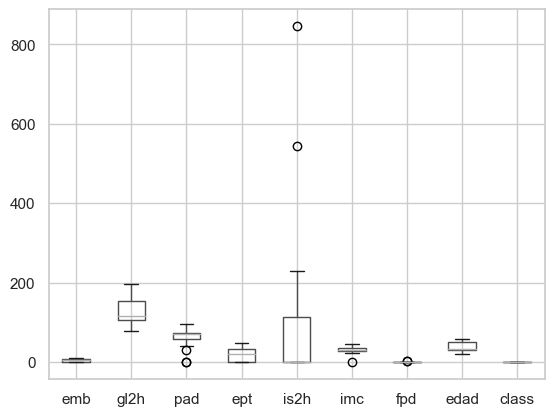

In [17]:
df.boxplot()
show()

Obsérvese que los datos en cero ejercen un efecto importante en el análisis. En el caso de la columna `is2h`, por ejemplo, con $11$ valores faltantes puestos a cero (esto se expone en la descripción del dataset), pareciera que ese es un valor *típico*. En estos casos es importanta realizar previamente el análisis para detectar valores faltantes expresados como $0$. A continuación, realizamos el análisis con los datos después de hacer una imputación con la media.

            emb        gl2h        pad        ept        is2h        imc  \
count  20.00000   20.000000  20.000000  20.000000   20.000000  20.000000   
mean    4.50000  129.400000  68.555556  32.363636  258.111111  32.578947   
std     3.56149   35.354446  15.462083   6.450400  170.973511   6.335496   
min     0.00000   78.000000  30.000000  19.000000   83.000000  23.300000   
25%     1.00000  106.000000  65.500000  31.500000  173.250000  27.850000   
50%     4.50000  117.000000  70.000000  32.363636  258.111111  30.750000   
75%     7.25000  152.500000  74.000000  33.022727  258.111111  35.875000   
max    10.00000  197.000000  96.000000  47.000000  846.000000  45.800000   

             fpd       edad     class  
count  20.000000  20.000000  20.00000  
mean    0.511650  37.450000   0.65000  
std     0.513691  11.591626   0.48936  
min     0.134000  21.000000   0.00000  
25%     0.198500  30.750000   0.00000  
50%     0.374500  32.000000   1.00000  
75%     0.560000  50.250000   1.000

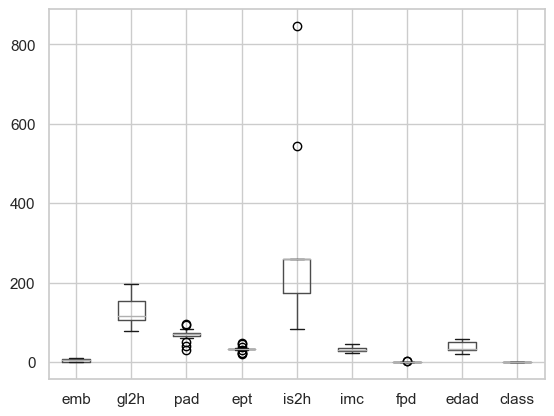

In [21]:
df = read_csv("Data/Pima Indian Data Set/pima-indians-diabetes.data-small", 
                 names = ['emb', 'gl2h', 'pad', 'ept', 'is2h', 'imc', 'fpd', 'edad', 'class'])
df2 = df.fillna(df.mean())
print(df2.describe(), '\n')
print(df2)

df2.boxplot()
show()

Obsérvese que la columna *is2h* (Cantidad de insulina en suero en dos horas) sigue teniendo un comportamiento problemático. Aparentemente, hasta donde podemos *adivinar* de los datos, 543 y 846 son valores atípicos. Sin embargo, con 11 valores faltantes (55%) es poco lo que se puede decir con certeza del comportamiento de estos datos.



## Valores inconsistentes

Una inconsistencia se define como la "falta de estabilidad y coherencia en una cosa". Un elemento inconsistente en un sistema es algo que no pertenece al sistema. Un valor inconsistente es un valor "extraño" al conjunto de datos (no atípico).

Una inconsistencia obvia es un valor o combinación de valores que no puede ocurrir en un contexto real: edad negativa, promedio de egreso de preparatoria menor a 60/100 (en México), (sexo=masculino, estado=embarazo), etc.

La detección de valores inconsistentes en un conjunto de datos es particularmente difícil. El conocimiento en el que se basa este proceso debe codificarse en forma de restricciones o reglas de edición. Una forma común de optimizar este proceso es a través de expresiones regulares.



## Inspección de los datos

En muchos casos, la limpieza de los datos debe hacerse de forma semi-manual (de ahí la cantidad de tiempo que ocupa esa actividad). El análisis estadístico puede ofrecer indicadores de cómo atacar los problemas. 

El método *describe*() de DataFrame ya arroja alguna información, particularmente la desviación estándar que también podemos obtener con el método *std*():

In [22]:
print(df.describe(), '\n\n',df.std())

            emb        gl2h        pad        ept        is2h        imc  \
count  20.00000   20.000000  18.000000  11.000000    9.000000  19.000000   
mean    4.50000  129.400000  68.555556  32.363636  258.111111  32.578947   
std     3.56149   35.354446  16.346333   8.891262  263.487877   6.509103   
min     0.00000   78.000000  30.000000  19.000000   83.000000  23.300000   
25%     1.00000  106.000000  64.500000  26.000000   94.000000  27.600000   
50%     4.50000  117.000000  71.000000  32.000000  168.000000  30.500000   
75%     7.25000  152.500000  74.000000  36.500000  230.000000  36.450000   
max    10.00000  197.000000  96.000000  47.000000  846.000000  45.800000   

             fpd       edad     class  
count  20.000000  20.000000  20.00000  
mean    0.511650  37.450000   0.65000  
std     0.513691  11.591626   0.48936  
min     0.134000  21.000000   0.00000  
25%     0.198500  30.750000   0.00000  
50%     0.374500  32.000000   1.00000  
75%     0.560000  50.250000   1.000

Una forma de medir el grado de variación conjunta de dos variables aleatorias es a través de la *covarianza*. Mientras mayor es el valor de covarianza mayor es la dependencia entre ambas variables.

La covarianza puede ser positiva, negativa o cercana a cero:

1. Si la covarianza es positiva, significa que cuando una variable tiende a aumentar, la otra también tiende a aumentar, lo que indica una relación positiva.
2. Si la covarianza es negativa, significa que cuando una variable tiende a aumentar, la otra tiende a disminuir, lo que indica una relación negativa.
3. Si la covarianza está cerca de cero, no hay una relación clara lineal entre las dos variables.

__Es importante destacar__ que la covarianza solo mide la relación lineal entre las variables y no la magnitud de esta relación. Además, la covarianza no está normalizada y su valor depende de las unidades en las que se miden las variables, lo que hace que sea difícil de interpretar en términos absolutos.

In [23]:
df.cov()

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
emb,12.684211,22.842105,26.202614,-4.563636,-33.694444,-7.676316,-0.072447,7.552632,-0.026316
gl2h,22.842105,1249.936842,50.450980,14.081818,9152.694444,-34.108187,3.812674,273.705263,7.831579
pad,26.202614,50.450980,267.202614,3.072727,915.972222,-23.745588,-2.256569,48.457516,0.196078
ept,-4.563636,14.081818,3.072727,79.054545,-56.055556,42.974545,0.312155,-9.172727,0.709091
is2h,-33.694444,9152.694444,915.972222,-56.055556,69425.861111,-500.912500,-22.356708,2858.166667,42.402778
imc,-7.676316,-34.108187,-23.745588,42.974545,-500.912500,42.368421,0.732903,-15.314912,0.247368
fpd,-0.072447,3.812674,-2.256569,0.312155,-22.356708,0.732903,0.263878,1.038955,0.048082
edad,7.552632,273.705263,48.457516,-9.172727,2858.166667,-15.314912,1.038955,134.365789,1.639474
class,-0.026316,7.831579,0.196078,0.709091,42.402778,0.247368,0.048082,1.639474,0.239474


Sin embargo, los valores de la covarianza suelen ser difíciles de interpretar. Una media alternativa, normalizada, es la *correlación lineal*:

In [24]:
df.corr()

,emb,gl2h,pad,ept,is2h,imc,fpd,edad,class
emb,1.000000,0.181410,0.466241,-0.260209,-0.080432,-0.331284,-0.039599,0.182946,-0.015099
gl2h,0.181410,1.000000,0.084704,0.038250,0.809138,-0.144324,0.209934,0.667874,0.452664
pad,0.466241,0.084704,1.000000,0.021859,0.202591,-0.226915,-0.258156,0.247384,0.024729
ept,-0.260209,0.038250,0.021859,1.000000,-0.021654,0.682090,0.058374,-0.081671,0.170738
is2h,-0.080432,0.809138,0.202591,-0.021654,1.000000,-0.255473,-0.127034,0.819404,0.364952
imc,-0.331284,-0.144324,-0.226915,0.682090,-0.255473,1.000000,0.215118,-0.209764,0.076683
fpd,-0.039599,0.209934,-0.258156,0.058374,-0.127034,0.215118,1.000000,0.174482,0.191270
edad,0.182946,0.667874,0.247384,-0.081671,0.819404,-0.209764,0.174482,1.000000,0.289022
class,-0.015099,0.452664,0.024729,0.170738,0.364952,0.076683,0.191270,0.289022,1.000000


La correlación entre variables ofrece una validación de los posibles valores atípicos o su clasificación como valores inconsistentes: Si dos variables tienen un alto valor de correlación, un valor "extraño" en una variable, acompañado de un valor "extraño" de otra variable en el mismo registro, pudiera indicar que son valores válidos, pero atípicos.


<hr style="border-width: 3px;">


### Tarea 3

* Analice los problemas de valores atípicos en el conjunto de datos *Pima Indians Diabetes* completo.

* Analice los problemas de valores faltantes y valores atípicos en los datos del ejemplo 2 (Rendimiento de combustible) y del ejemplo 3 (Taxonomís de flores).


**Fecha de entrega**: ...

In [ ]:
#https://www.youtube.com/watch?v=R2U3apzVB9E